# 5.1 Decision Trees

In this chapter, we explore the application of Decision Trees, one of the most widely used machine learning algorithms, to our kidney disease dataset. Decision Trees are popular for their ease of interpretation, making them an excellent choice for healthcare, where understanding the reasoning behind a prediction can be as crucial as the prediction itself. We will train the decision tree model, evaluate its performance, visualize its learning curves, and assess feature importance. We will also inspect the decision trees themselves and compare their structure.

In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree

## 5.1.1: Model Training and Evaluation

In this section, we start with the training of our Decision Tree Classifier. The model is trained on the kidney disease dataset, using different imputation techniques to handle missing data. We will then evaluate its performance using key metrics such as accuracy, precision, recall, and F1-score.

In [16]:
from util.functions import impute_and_train

model_constructor = DecisionTreeClassifier
df_numeric = pd.read_csv('processed/df_numeric.csv')

df_num = pd.read_csv('processed/df_numeric.csv')

results = impute_and_train(df_num ,model_constructor)

learning with mean imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with median imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with mode imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with KNN imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with MICE imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with iterative imputed data
Cross-validation iteration 

### 5.1.2 Model Performance Visualization

This section involves the visualization of our model's performance metrics. The metrics are plotted to better understand the model's strengths and potential areas for improvement. We will also visualize the confusion matrices resulting from the different model iterations to better comprehend the model's classification performance.

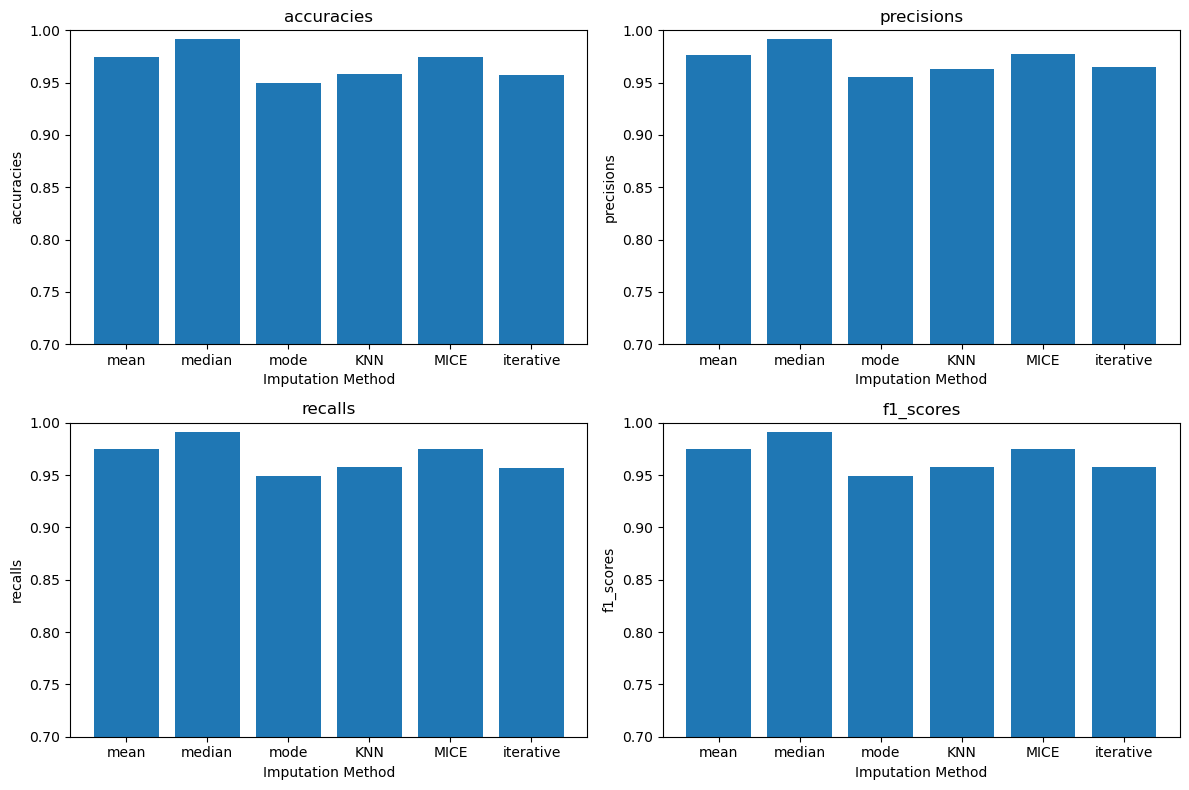

In [17]:
from util.functions import plot_metrics
metrics = results['metrics']
plot_metrics(results['metrics'])

    

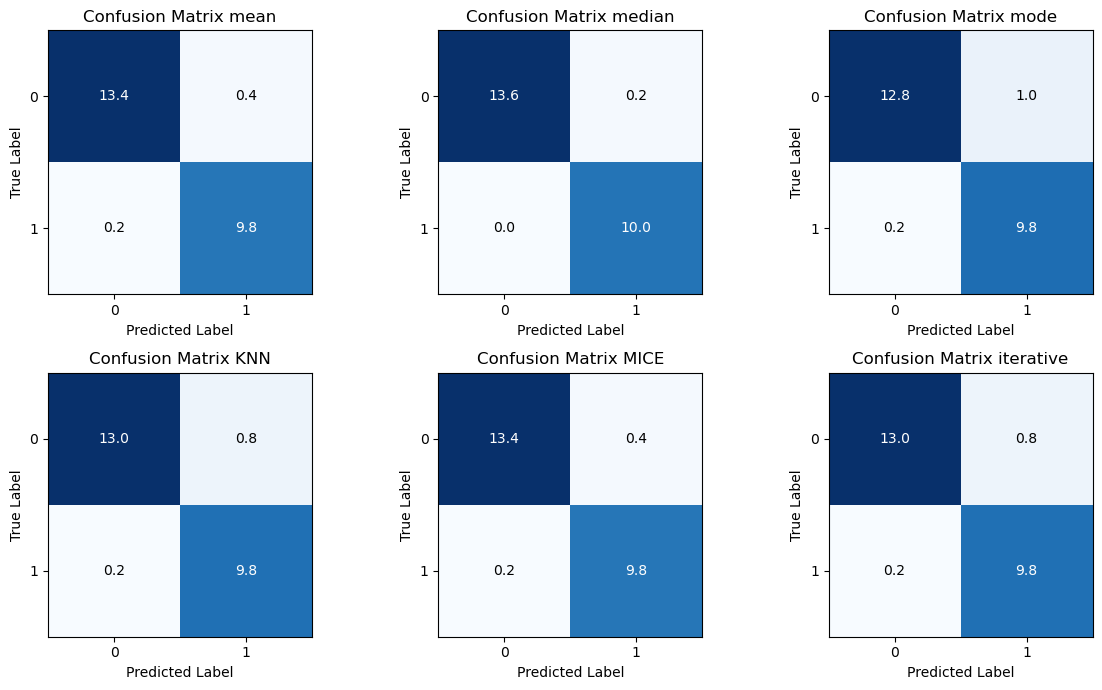

In [18]:
from util.functions import plot_mean_confusion_matrices
confusion_matrices = results['confusion_matrices']
plot_mean_confusion_matrices(confusion_matrices)

### 5.1.3 Learning Curves Analysis

This subchapter introduces the concept of learning curves and how we can use them to gauge our model's performance. Learning curves are plots that show changes in learning over time in terms of experience or education. Here, we plot the learning curves for our Decision Tree model to analyze its learning process and identify any potential issues like overfitting or underfitting.

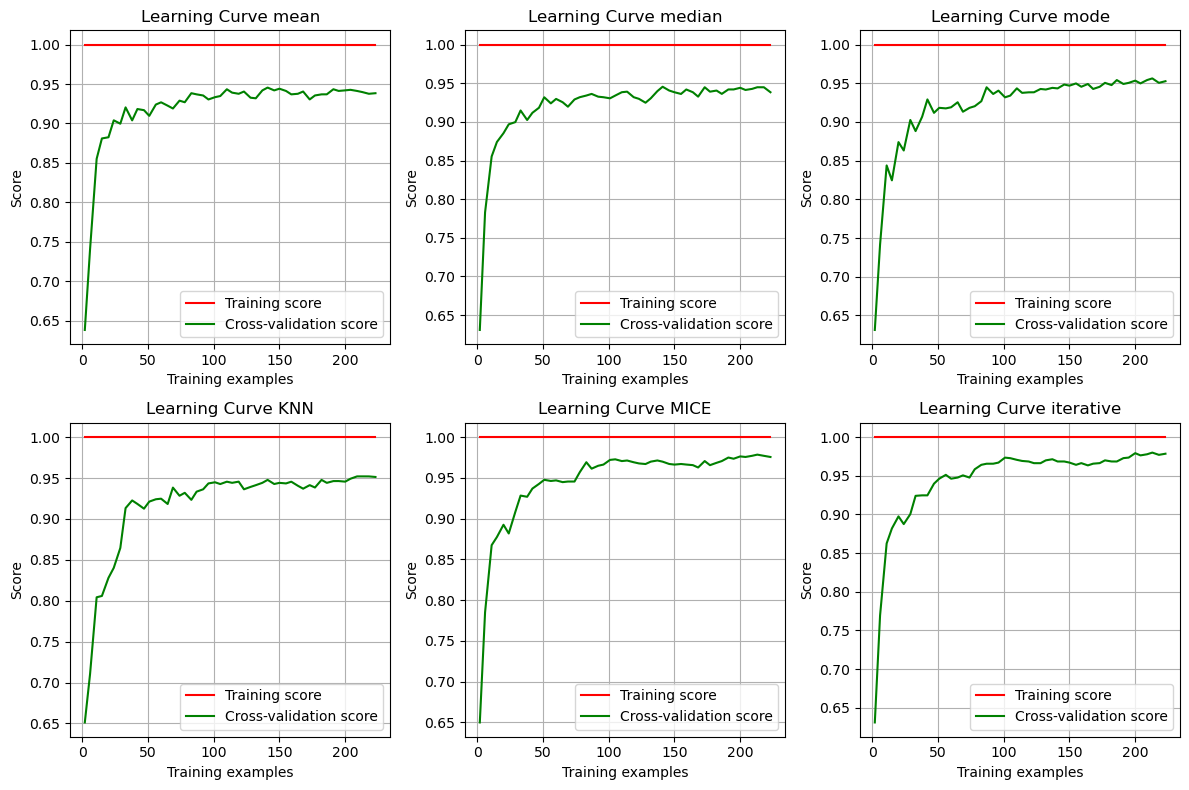

In [19]:
from util.functions import plot_learning_curves
plot_learning_curves(results['learning_curves'])

### 5.1.4 Feature Importance Evaluation

A key benefit of decision trees is their ability to provide feature importance, giving insights into which variables have the most influence on the model's decisions. This subchapter presents an evaluation of the feature importances derived from our Decision Tree model.

feature importances for iteration 0


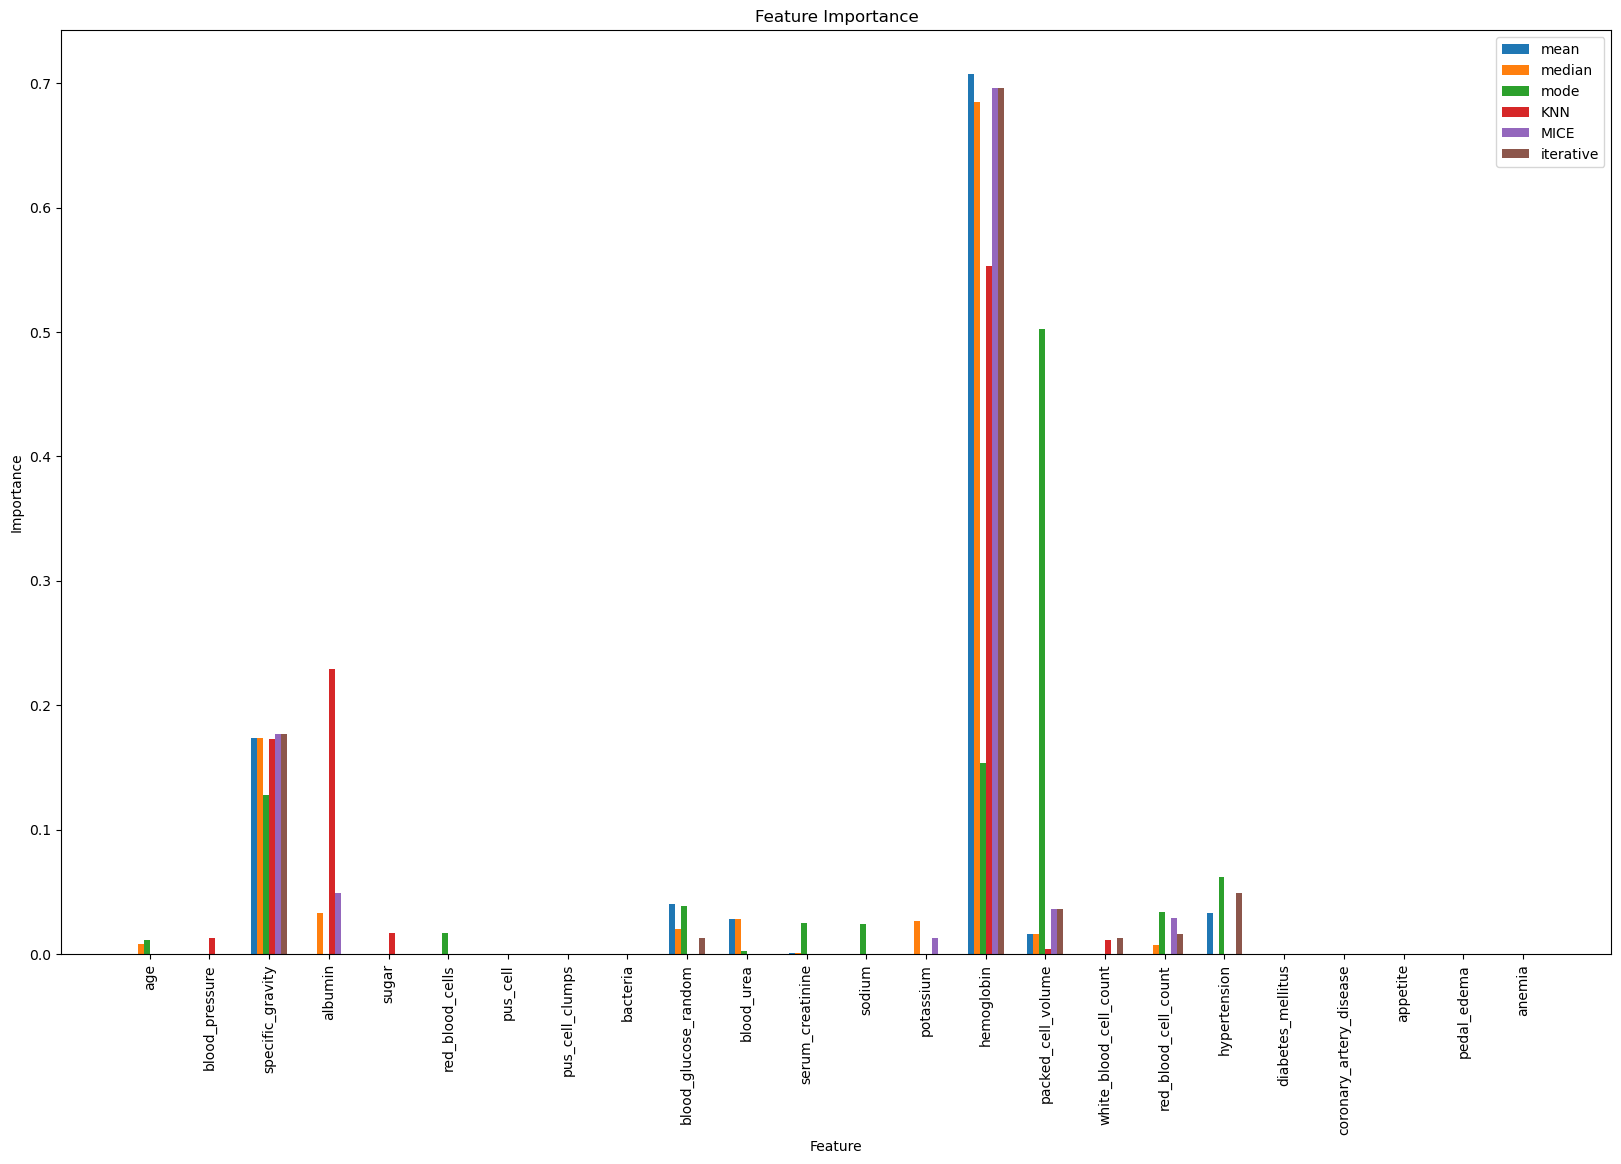

feature importances for iteration 1


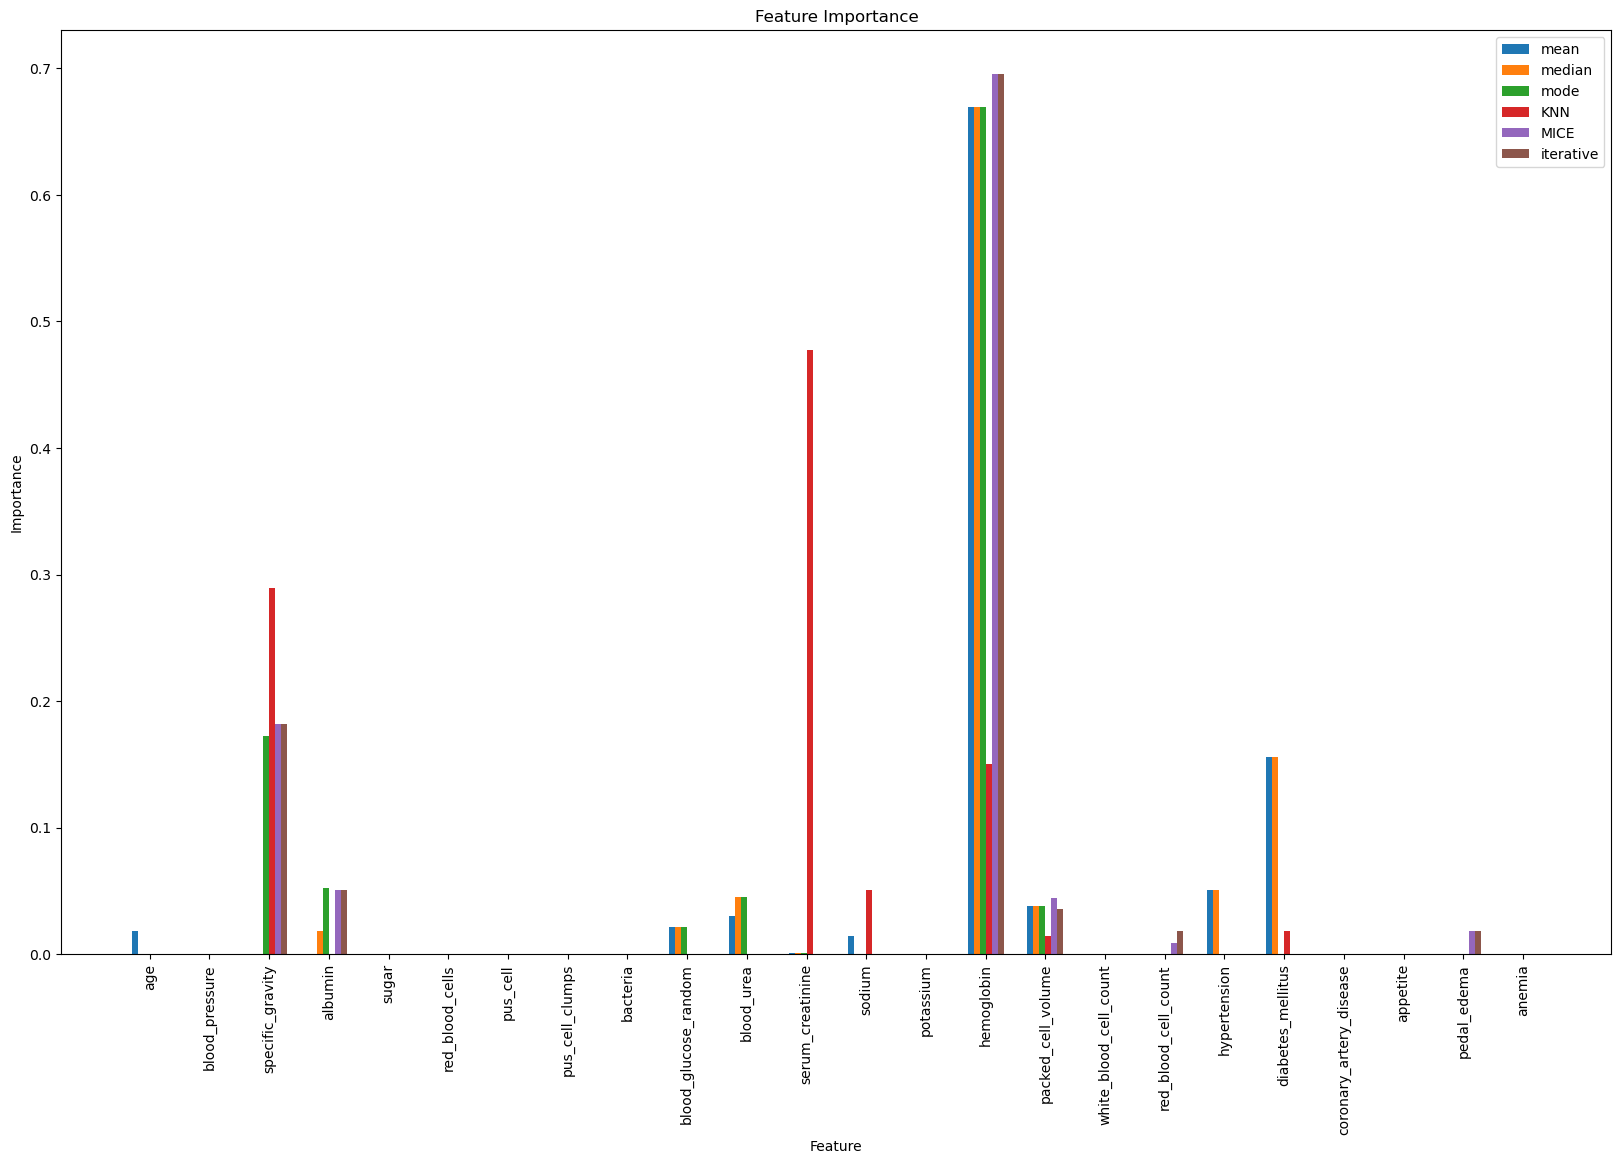

feature importances for iteration 2


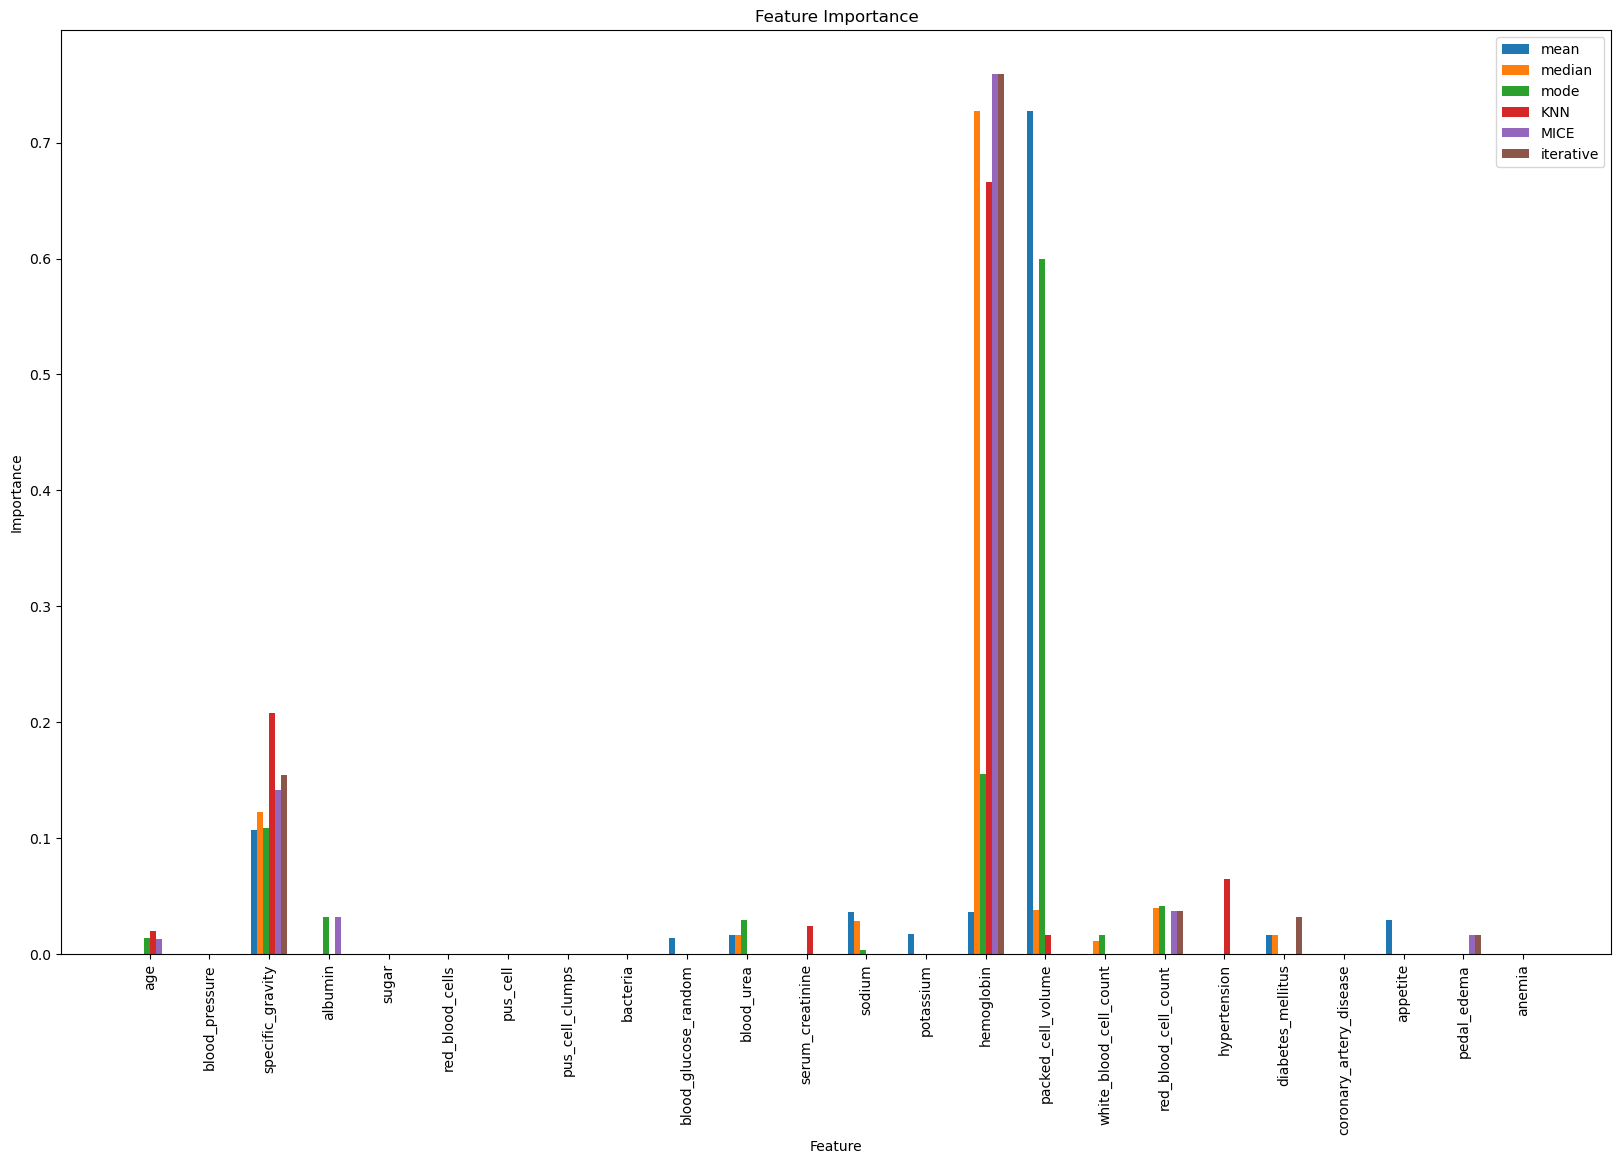

feature importances for iteration 3


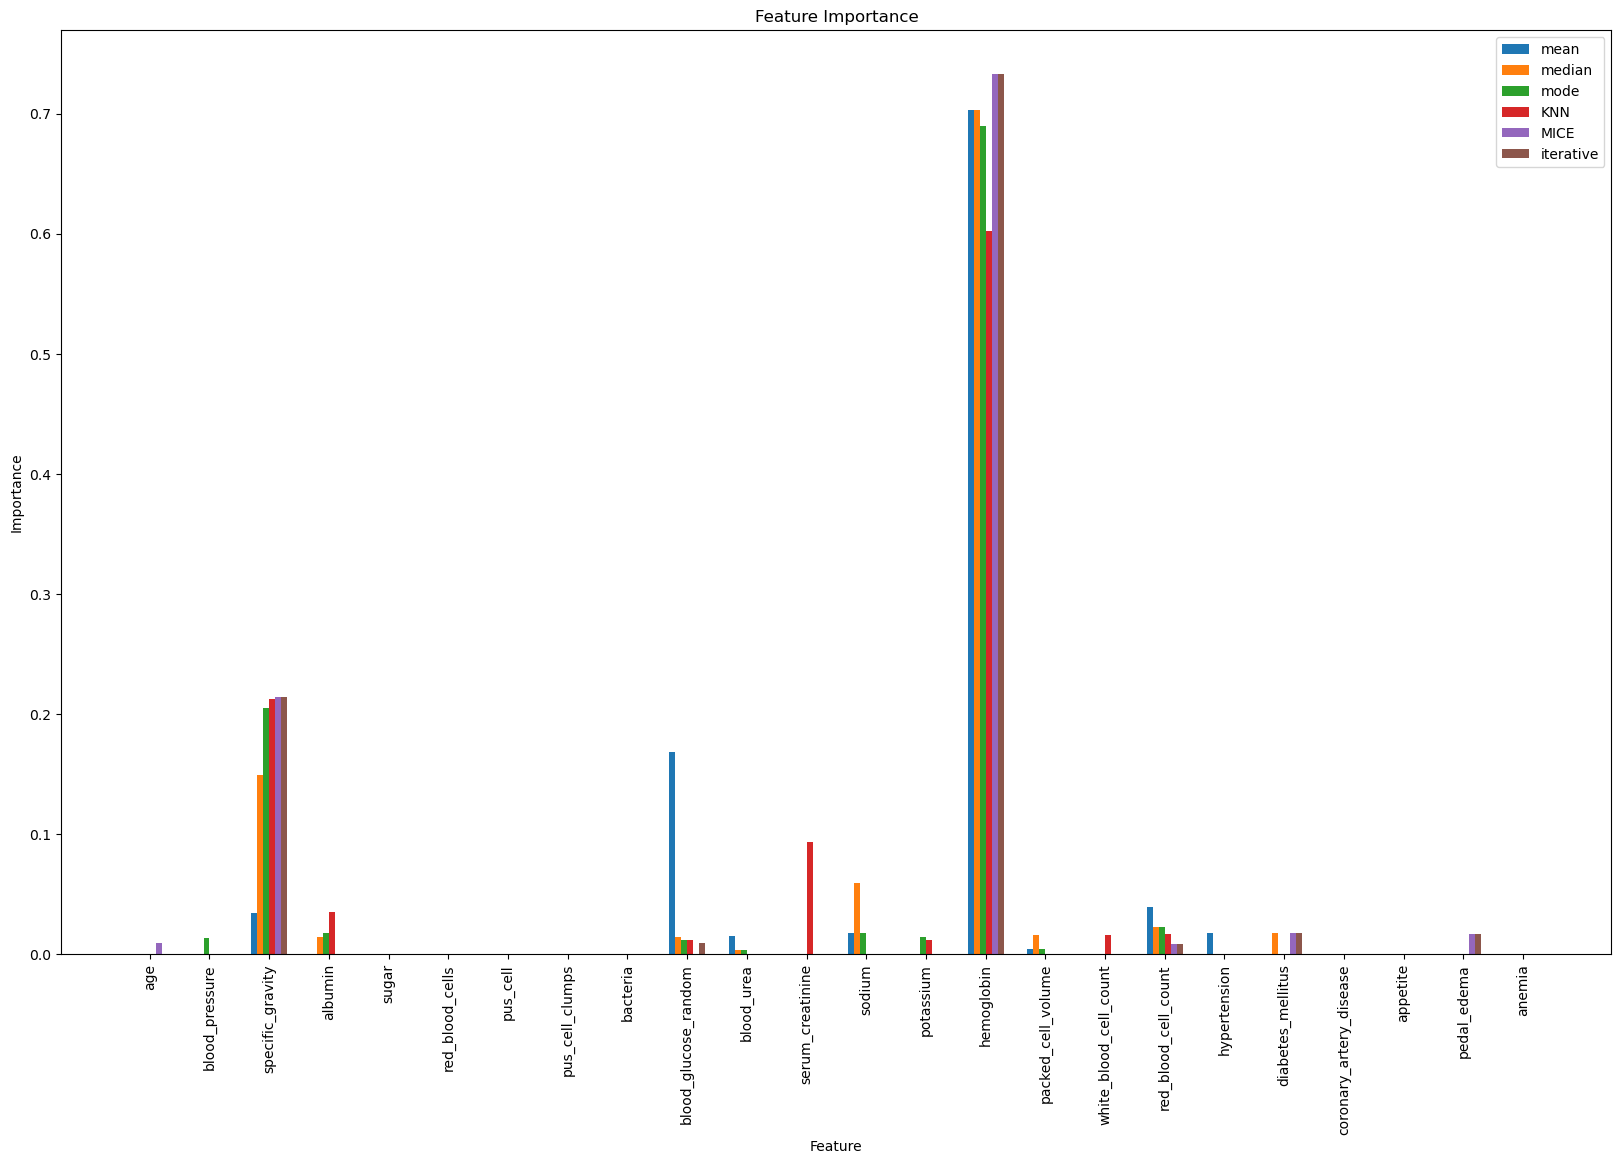

feature importances for iteration 4


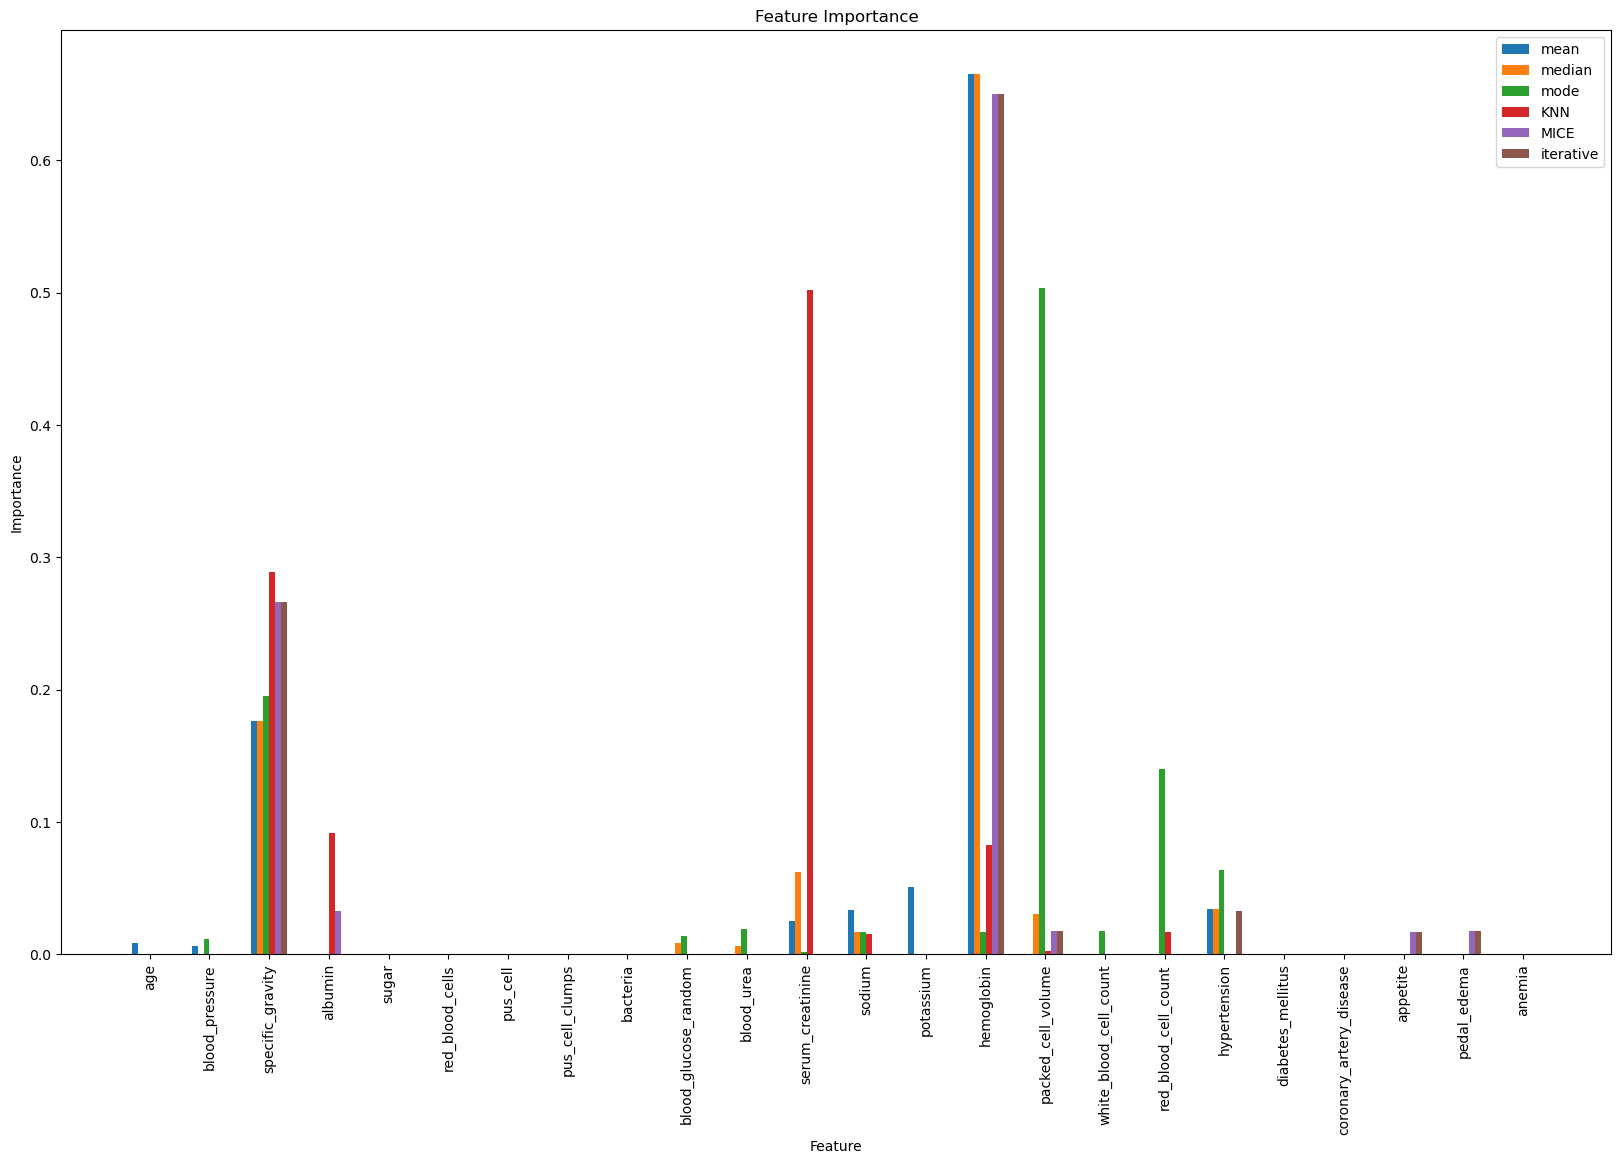

In [20]:
from util.functions import plot_feature_importances
# plot all feature importances as subplots
import pandas as pd
import numpy as np
df_numeric = pd.read_csv('processed/df_numeric.csv')
feature_importances = {}
all_feature_importances = {}
for i in range(5):
    for (name, models) in results['models'].items():
        feature_importances[name] = pd.DataFrame(models[i].feature_importances_, index=df_numeric.drop(columns=['class']).columns, columns=['Importance'])

    print('feature importances for iteration', i)
    plot_feature_importances(feature_importances)


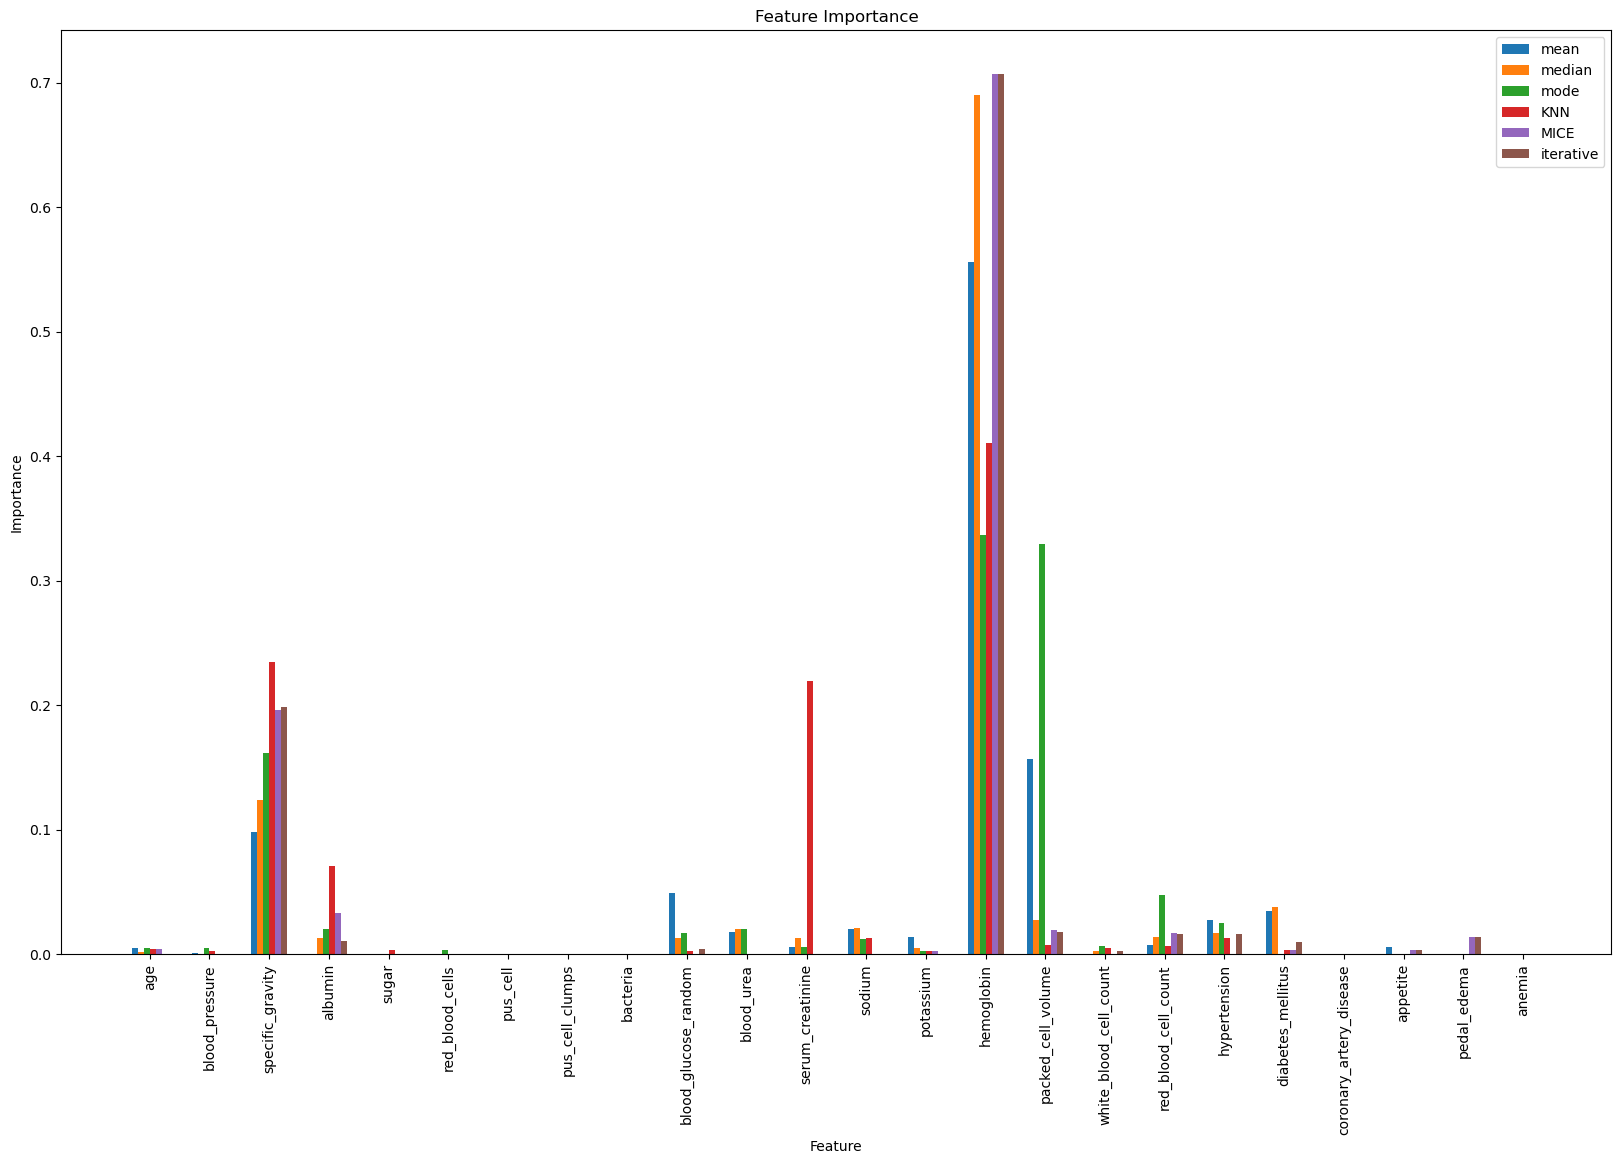

In [21]:
# plot all feature importances as subplots
import pandas as pd
import numpy as np
df_numeric = pd.read_csv('processed/df_numeric.csv')
feature_importances = {}
feature_importances_df = pd.DataFrame(columns=df_numeric.drop(columns=['class']).columns, index=pd.MultiIndex.from_product([results['models'].keys(), range(5)], names=['imputation', 'iteration']))

for (name, models) in results['models'].items():
    fi = []
    for i, model in enumerate(models):
        normalized = model.feature_importances_ / np.sum(model.feature_importances_)
        fi.append(normalized)
        feature_importances_df.loc[(name, i)] = normalized
    
    feature_importances[name] = pd.DataFrame(np.mean(fi, axis=0), index=df_numeric.drop(columns=['class']).columns, columns=['Importance'])

feature_importances_df.to_csv('results/feature_importances_decision_tree.csv', index=True)
plot_feature_importances(feature_importances)

### 5.1.5 Decision Tree Visualization

This section provides a visual representation of the trained decision trees. Each node in the tree represents a decision based on a feature, and each leaf represents a class prediction. By visualizing the tree, we can understand the logic behind the model's decision-making process.

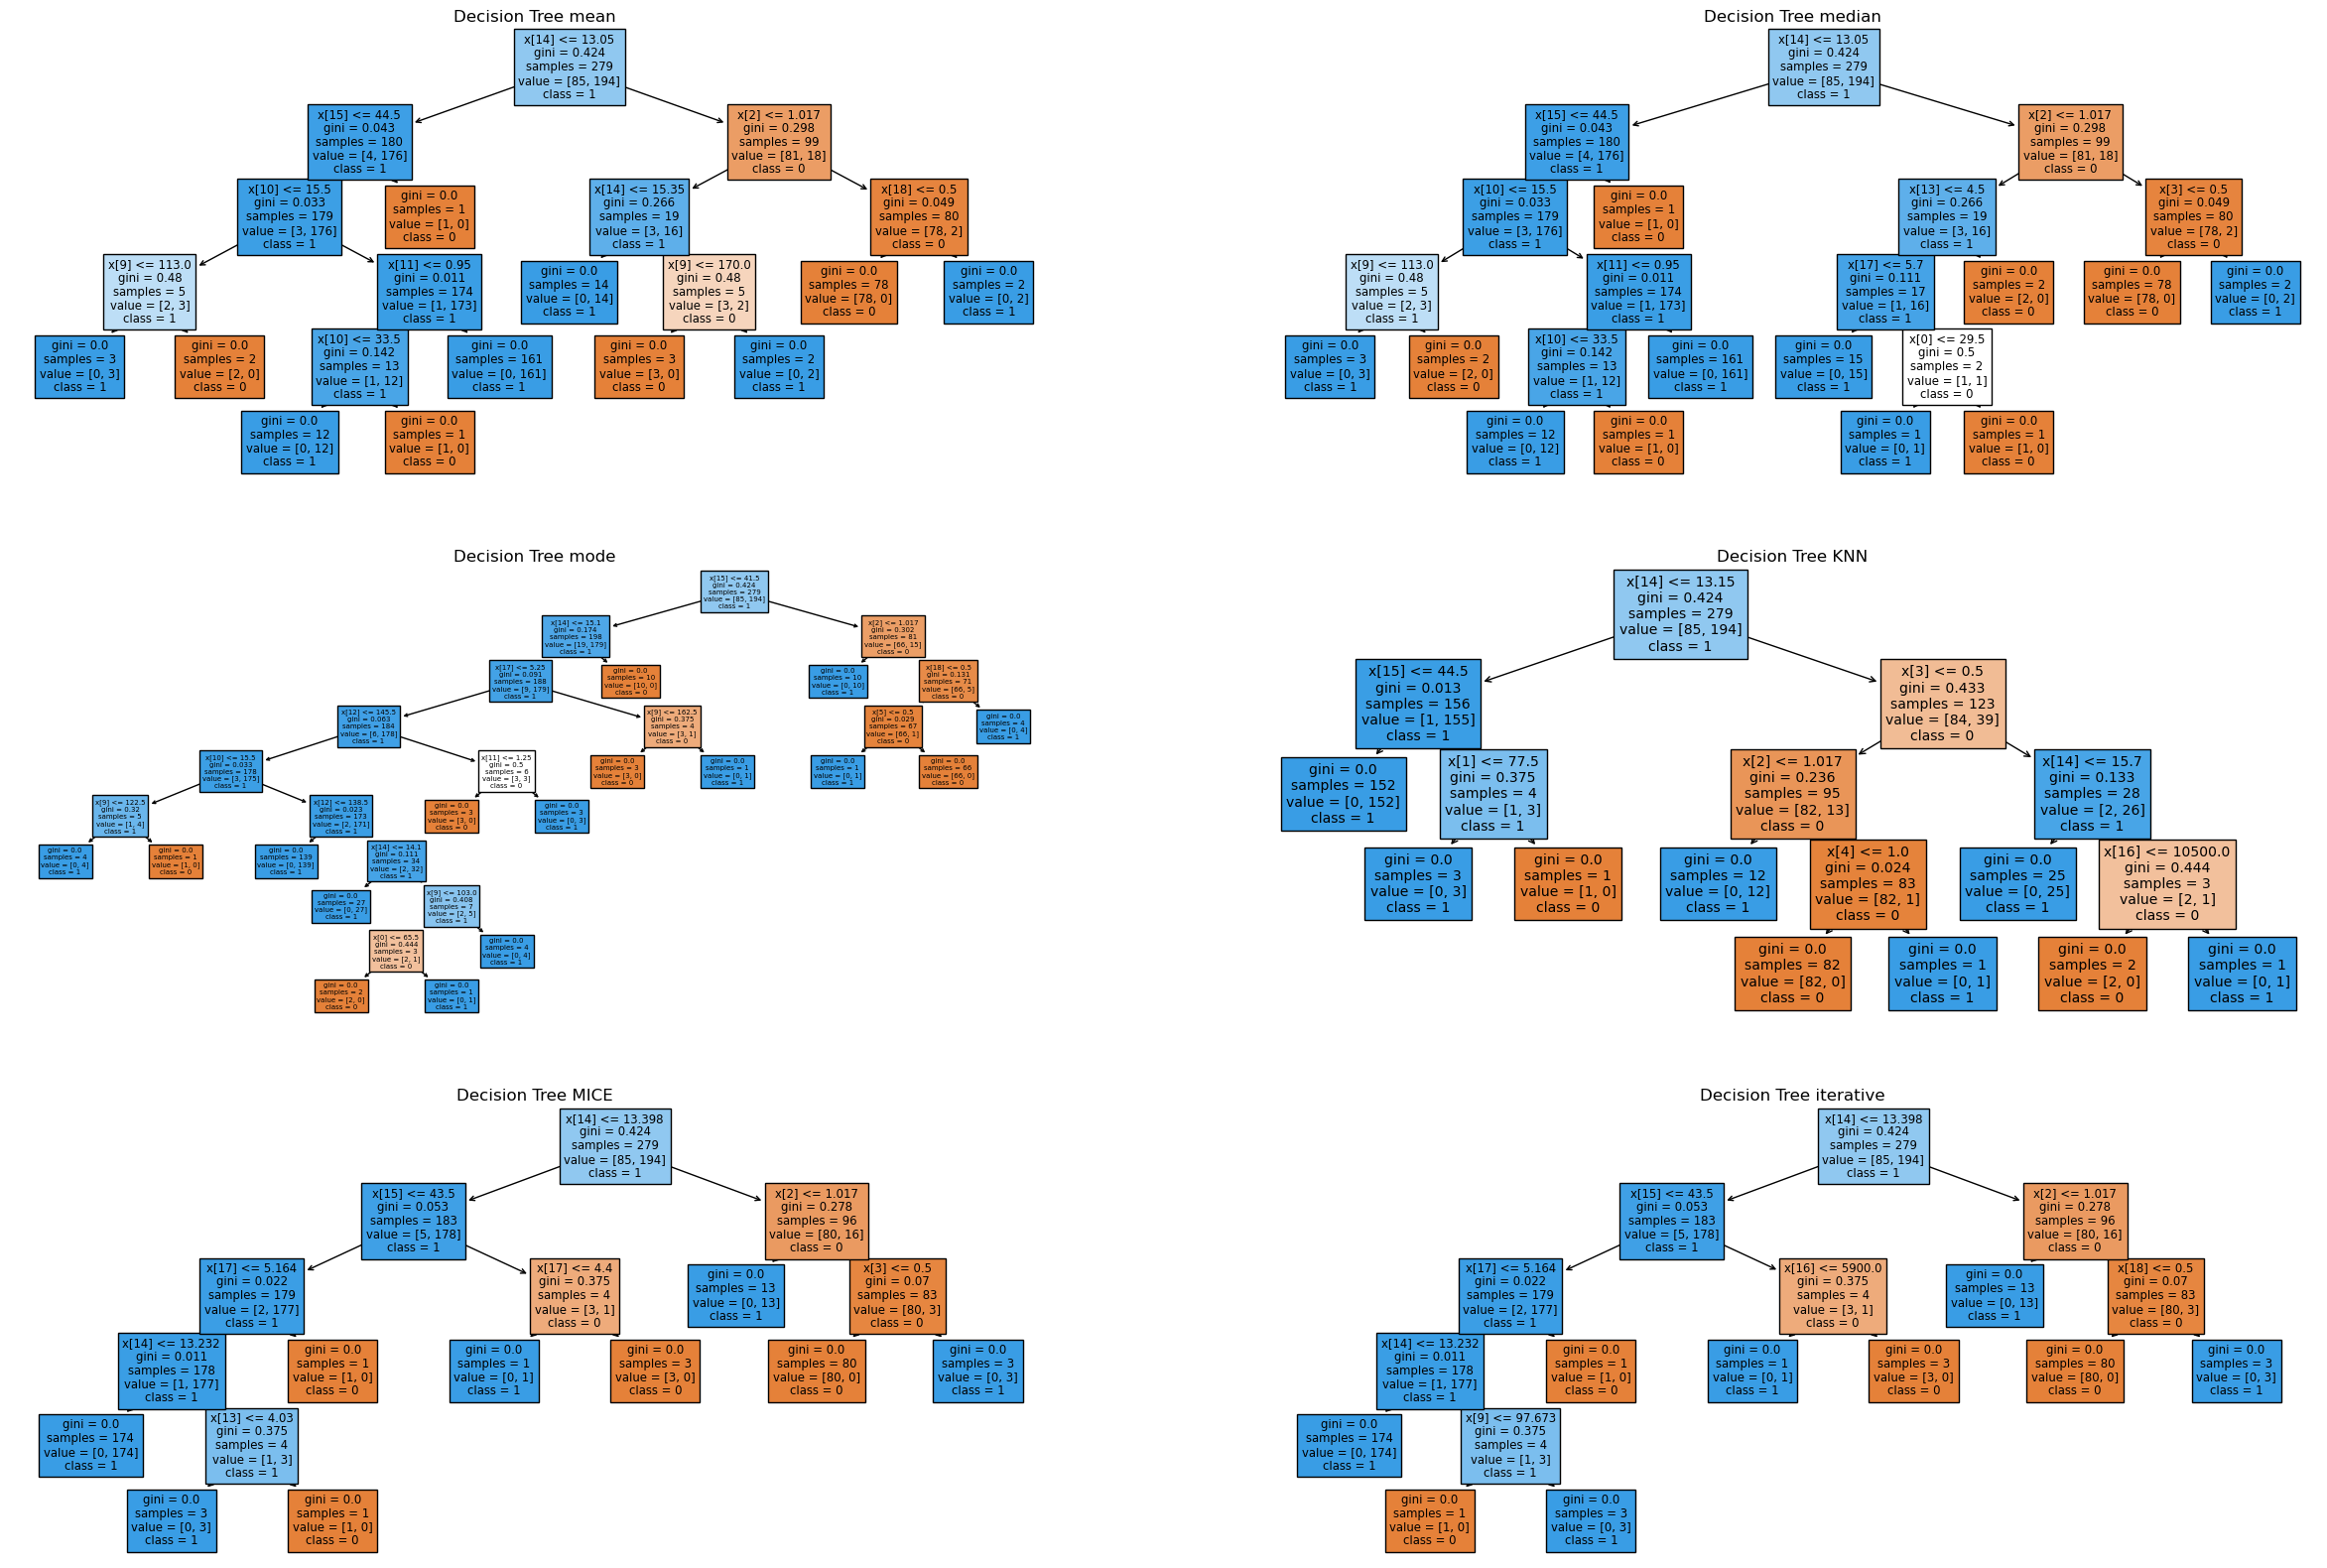

In [22]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))

df_numeric = pd.read_csv('processed/df_numeric.csv')
for i, (name, models) in enumerate(results['models'].items()):
    
    model = models[0]
    plot_tree(model, ax=axs.flat[i], class_names=['0', '1'], filled=True)
    axs.flat[i].set_title(f'Decision Tree {name}')

### 5.1.6: Aggregated Performance Metrics

Finally, we collate the performance metrics of the Decision Tree models trained using different imputation methods. A comparison of these aggregated metrics will help us understand the impact of different imputation techniques on the overall performance of the model.

In [16]:
metrics_dtree = results['metrics']

metrics_dtree = pd.DataFrame(metrics_dtree)


for col in metrics_dtree.columns:
    print(col)

m = []
for col in metrics_dtree.columns:
    m.append(metrics_dtree[col])

#print(m)

l = []

for i in range(4):
    for j in m[i]:
        l.append(j)

mean = []

for i in l:
    mean.append(np.mean(i))

print(mean)

print(mean[6:12])

mean_dict = {
    'accuracies': mean[0:6],
    'precisions': mean[6:12],
    'recalls': mean[12:18],
    'f1_scores': mean[18:24]
}

mean_df = pd.DataFrame(mean_dict)


mean_df.to_csv('metrics_dtree.csv', index= False)

accuracies
precisions
recalls
f1_scores
[0.9825757575757577, 0.9832167832167833, 0.975, 0.9582497212931995, 0.9663043478260869, 0.9659420289855074, 0.9843434343434343, 0.9846317425264793, 0.9756944444444443, 0.963066634928763, 0.9678683574879227, 0.9705561045234958, 0.9825757575757577, 0.9832167832167833, 0.975, 0.9582497212931995, 0.9663043478260869, 0.9659420289855074, 0.9827188787973101, 0.9831633525751172, 0.9750144927536232, 0.9582368027059893, 0.966386642935842, 0.9662012823462099]
[0.9843434343434343, 0.9846317425264793, 0.9756944444444443, 0.963066634928763, 0.9678683574879227, 0.9705561045234958]


### 5.1.8 Conclusion

In this chapter, we have successfully applied a Decision Tree classifier to our kidney disease dataset and assessed its performance. The visualizations and evaluations provide insight into the model's learning process, the importance of different features, and the decision-making logic. These insights are not only crucial in model interpretation but also form the foundation for improving model performance.

While decision trees offer a great deal of interpretability, they can sometimes suffer from high variance or overfitting. To overcome these potential challenges, we will explore Random Forests in the next chapter. Random Forests build upon decision trees, creating an ensemble of trees to improve prediction performance and robustness. By leveraging the strength of multiple decision trees, we will see if we can achieve a more accurate model for predicting kidney disease.